In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage import io, color, transform, feature
%matplotlib inline

## read and describe the metadata

In [2]:
fpn_csv = 'cluster_images2.csv'
data = pd.read_csv(fpn_csv, encoding='ISO-8859-1')

In [3]:
# get column names
list(data)

['s_no',
 'artist',
 'title',
 'art_movement',
 'museum_venue',
 'country_of_origin',
 'has_text',
 'primary_medium',
 'medium',
 'work_size',
 'date',
 'representation',
 'representation_semi',
 'kinetic',
 'map',
 'map2',
 'spatial_dimension',
 'spatial_dimension2',
 'pl',
 'si',
 'va',
 'te',
 'co',
 'or',
 'sh',
 'reflection',
 'po',
 'li',
 'ar',
 'notes']

In [4]:
data.head()

,s_no,artist,title,art_movement,museum_venue,country_of_origin,has_text,primary_medium,medium,work_size,...,va,te,co,or,sh,reflection,po,li,ar,notes
0,2,Giorgio de Chirico,The Uncertainty of the Poet,surrealism,Tate,Italy,0,painting,"painting, oil on canvas",106 x 94 cm,...,3,0,0,4,3,0,0,0,5,"distorted perspective, shadow, signification o..."
1,3,Giovanni Anselmo,Direction,arte povera,Tate,Italy,0,sculpture,"sculpture, fabric, glass & metal",24 x 420 x 335 cm,...,1,3,0,3,2,0,0,0,5,"hard to understand the viewpoint, sense of for..."
2,4,Milton Avery,Yellow Sky,modernism,Tate,America,0,painting,"painting, oil on canvas",156 x 184 cm,...,2,4,4,2,4,0,0,0,5,"flatish, textured shapes & specific colors-lin..."
3,5,Gillian Avery,Distillation,abstraction,Tate,UK,0,painting,"painting, oil, household paint on hardboard",213 x 152 cm,...,1,2,0,2,4,0,0,0,5,"shapes, layers, paint handlng/texture, orienta..."
4,6,Joseph (Jef) Banc,Pair-Bearing Matrix,abstraction,Tate,France,0,painting,"painting, mixed media on canvas",73 x 60 cm,...,1,4,1,0,4,0,0,0,5,"ambiguity through abstraction, odd shape, v te..."


## create a subset of the columns you will use to fit KMeans

Here, I am **arbitrarily** choosing the seven [visual variables defined by Bertin](https://infovis-wiki.net/wiki/Visual_Variables). Variable descriptions [here](https://github.com/visualizedata/ml/blob/master/ML_assignment_3/option_2/contents-of-cluster_images.csv). 

You should choose the columns that you decide will best define the clusters. You may need to make transformations on existing variables. 

In [5]:
X = data[['co', 'or', 'pl', 'ar', 'spatial_dimension', 'spatial_dimension2', 'reflection']]

In [6]:
X.head()

,co,or,pl,ar,spatial_dimension,spatial_dimension2,reflection
0,0,4,2,5,0,0,0
1,0,3,4,5,1,0,0
2,4,2,3,5,0,0,0
3,0,2,4,5,0,1,0
4,1,0,1,5,0,0,0


# KMeans

In [7]:
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AgglomerativeClustering

## plot inertia scores by number of clusters

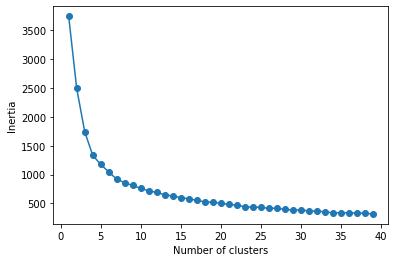

In [20]:
# first attempt at fitting K means to view change in Inertia

# container to store inertia scores over iterations
distortions = []

# fit KMeans iteratively to begin to assess the appropriate number of clusters
for i in range(1, 40):
    km = KMeans(n_clusters=i, init='random', n_init=200, max_iter=1000, tol=1e-10)
    km.fit(X)
    distortions.append(km.inertia_)

# fit KMeans iteratively to begin to assess the appropriate number of clusters
# for i in range(1, 30):
#     clustering = AgglomerativeClustering(n_clusters=i, affinity='euclidean', memory=None, connectivity=None, compute_full_tree='auto', linkage='ward', distance_threshold=None)
#     clustering.fit(X)
#     distortions.append(clustering.inertia_)
    
# vizualize change in inertia
plt.plot(range(1, 40), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

## create silhouette plots to assess various specifications for `n_clusters` in `KMeans`

In [23]:
# modify this list to include the numbers of clusters you want to see
# I have *arbitrarily* chosen these values
range_n_clusters = [4,5,6,15,20,25]

For n_clusters = 4 The average silhouette_score is : 0.3606179512037532


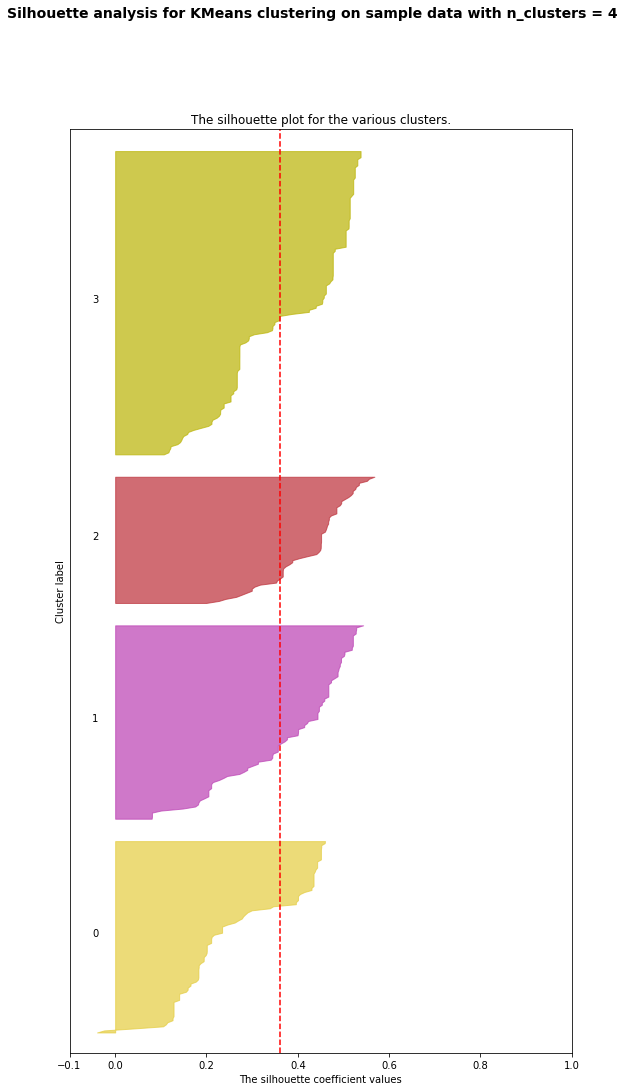

For n_clusters = 5 The average silhouette_score is : 0.3727321407751657


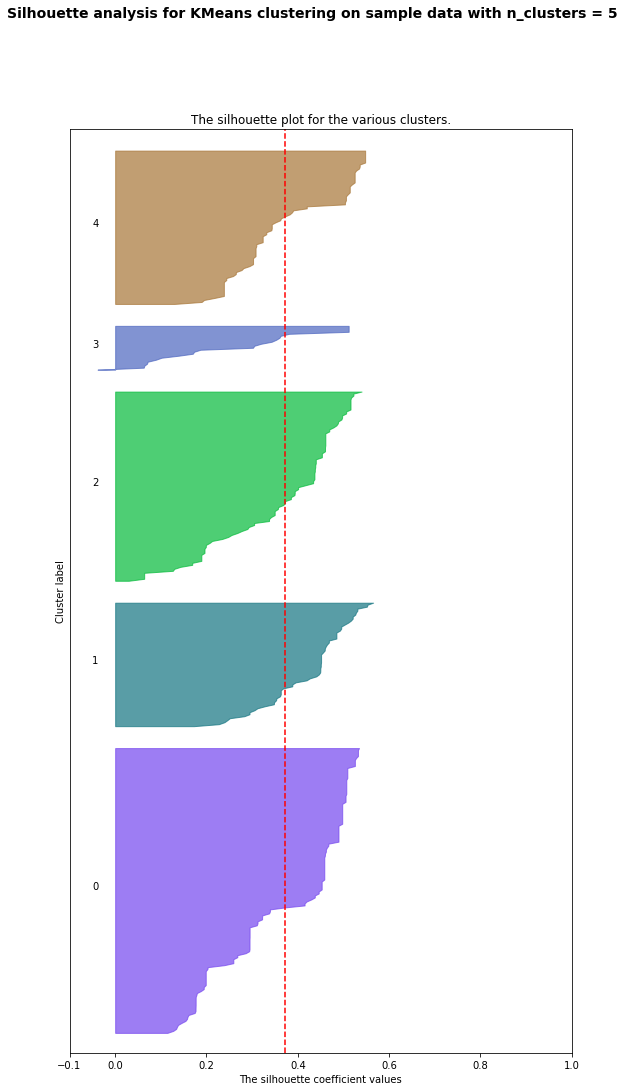

For n_clusters = 6 The average silhouette_score is : 0.3115823207509605


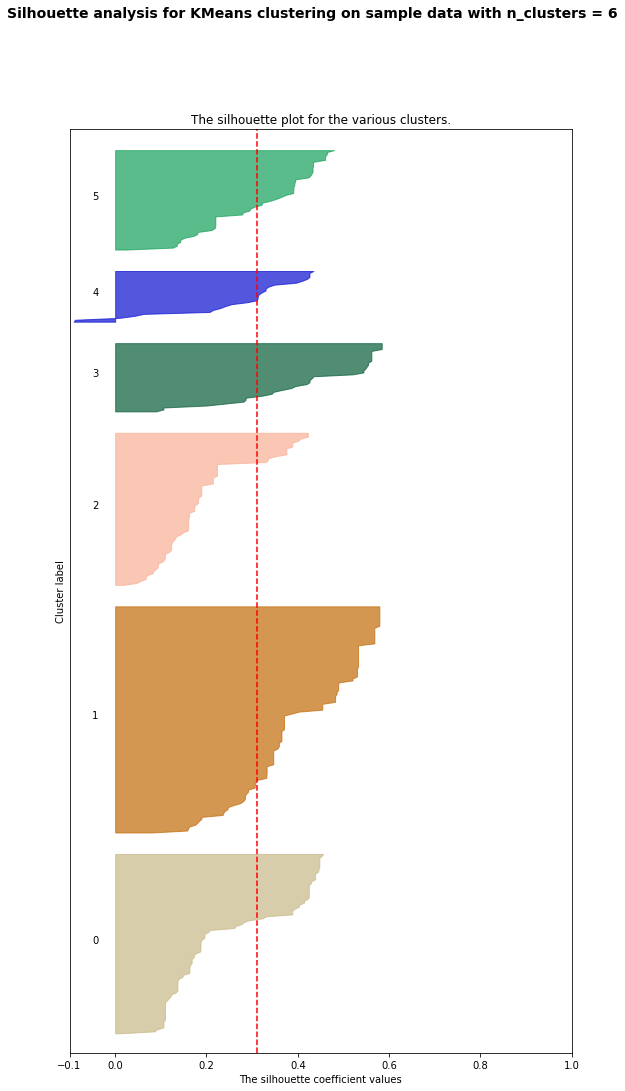

For n_clusters = 15 The average silhouette_score is : 0.317457114855128


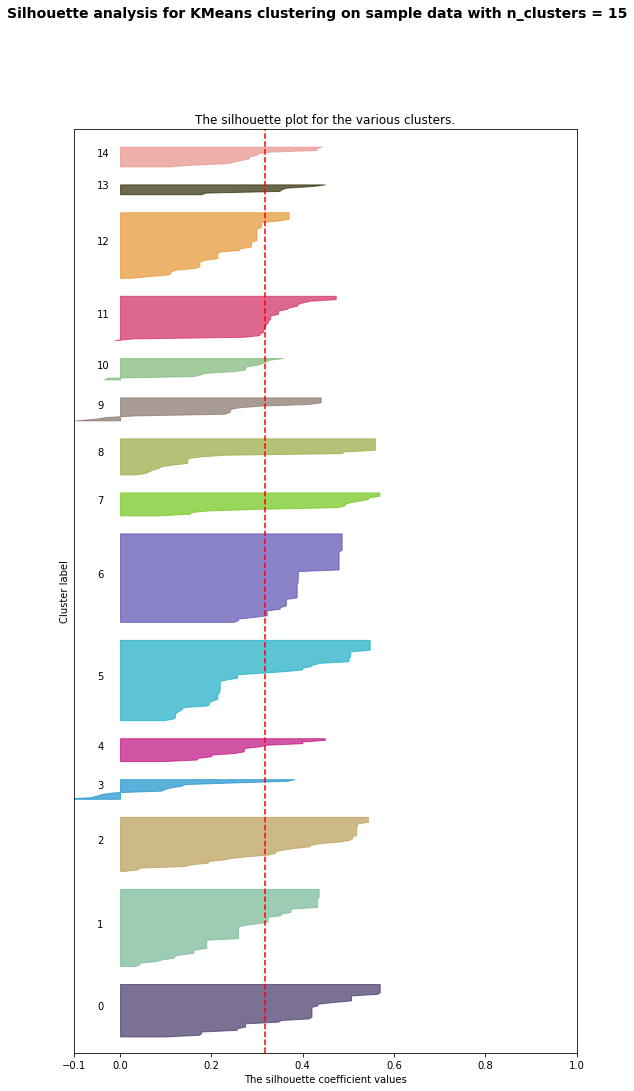

For n_clusters = 20 The average silhouette_score is : 0.27326575403009656


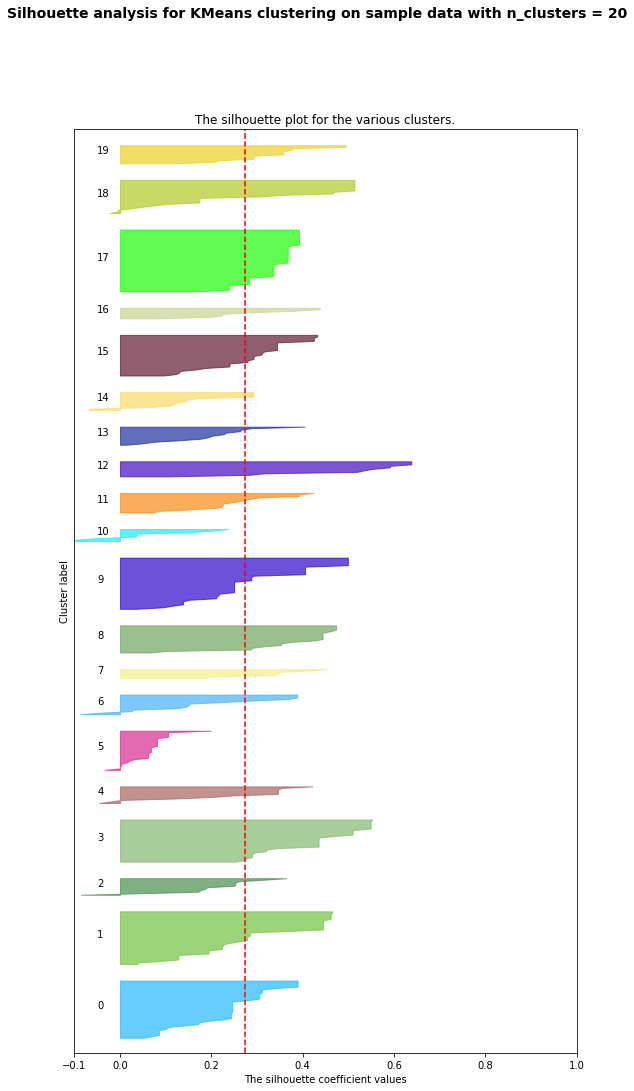

For n_clusters = 25 The average silhouette_score is : 0.2977518443667254


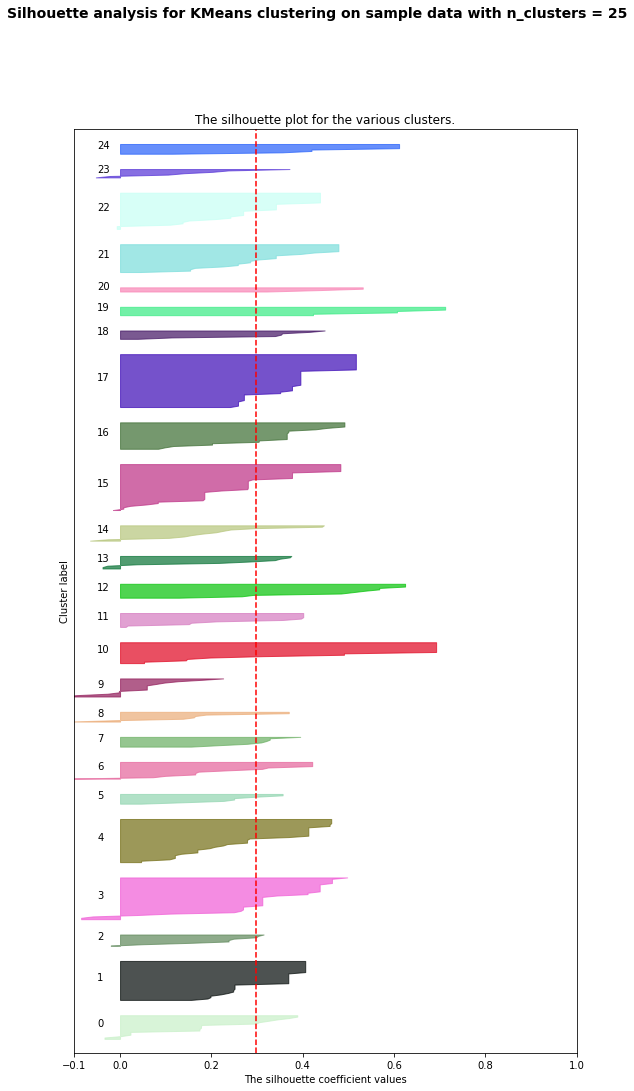

In [24]:
# modified from: http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import random

for n_clusters in range_n_clusters:
    # Create a subplot
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(9, 17)

    # The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        # select a random color for this cluster
        r = lambda: random.randint(0,255)
        color = '#%02X%02X%02X' % (r(),r(),r())
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

## final fit

After you have decided which features to include and the number of clusters you want, fit your final KMeans model. I have **arbitrarily** chosen 5. 

In [26]:
# set the number of clusters in the final model
my_n_clusters = 15

In [58]:
km = KMeans(n_clusters=my_n_clusters, init='random', n_init=200, max_iter=1000, tol=1e-10)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=1000,
       n_clusters=15, n_init=200, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=1e-10, verbose=0)

## look at results

The key to knowing if you have chosen the right features and clusters: looking at the images in each cluster and deciding whether they seem to belong together. You could extend this starter code to display the images in this notebook, or you may decide to use Python to write an html file/files to view the images by cluster.

 
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Images in cluster: 0
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
13_small.jpg
35_small.jpg
46_small.jpg
49_small.jpg
172_small.jpg
181_small.jpg
186_small.jpg
244_small.jpg
245_small.jpg
263_small.jpg
272_small.jpg
334_small.jpg
338_small.jpg
348_small.jpg
 
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Images in cluster: 1
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
3_small.jpg
5_small.jpg
28_small.jpg
38_small.jpg
40_small.jpg
44_small.jpg
51_small.jpg
58_small.jpg
74_small.jpg
85_small.jpg
92_small.jpg
94_small.jpg
97_small.jpg
100_small.jpg
103_small.jpg
106_small.jpg
111_small.jpg
112_small.jpg
117_small.jpg
127_small.jpg
129_small.jpg
133_small.jpg
139_small.jpg
146_small.jpg
150_small.jpg
162_small.jpg
216_small.jpg
218_small.jpg
247_small.jpg
268_small.jpg
274_small.jpg
287_small.jpg
288_small.jpg
299_small.jpg
320_small.jpg
333_small.jpg
335_small.jpg
336_small.jpg
3

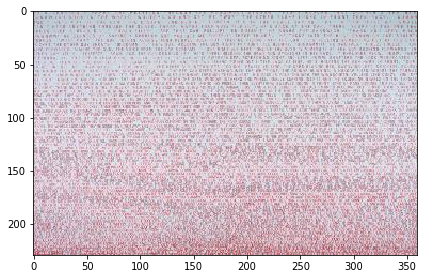

In [59]:
for i in range(0, max(km.labels_)+1):
    print(" ")
    print("* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * ")
    print("Images in cluster: " + str(i))
    print("* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * ")
    for j in range(0, len(km.labels_)):
        if km.labels_[j] == i:
            print(str(j+2) + '_small.jpg')

ci_path = 'img_small/7_small.jpg'

            
def image_manipulation(imname, imgs_path, imview=False):
    warnings.filterwarnings('ignore')
    imname = imgs_path + imname + '.jpg'
    
    if imview==True:
        io.imshow(final_image)
    warnings.filterwarnings('always')
    return final_image
this_imname = ci_path
io.imshow(io.imread(this_imname))
